In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/filip/OneDrive/Desktop/Molecular Stethoscope/Summer/Molecular-Stethoscope-Summer_Start/Molecular-Stethoscope/Jerome/Transformed AD Dataset Feb 23 for Purdue.csv")

In [3]:
data.head()

,Disease,Isolate ID,gene_id,Description,r1,r2,TPM,all_mean,all_sd,z,Coeff
0,AD,2426,ENSG00000002016.16,RAD52,3.241100,5.921222,4.581161,6.492253,9.061651,-0.210899,-0.007079
1,AD,2426,ENSG00000003147.17,ICA1,34.247975,19.480717,26.864346,36.356860,19.847739,-0.478267,-0.023359
2,AD,2426,ENSG00000004487.15,KDM1A,29.117113,25.974290,27.545701,27.476950,6.966728,0.009868,-0.049431
3,AD,2426,ENSG00000004766.15,VPS50,10.251166,16.598154,13.424660,16.675052,7.177522,-0.452857,-0.009210
4,AD,2426,ENSG00000004809.13,SLC22A16,2.227596,0.270566,1.249081,4.114478,4.692319,-0.610657,-0.166043


In [10]:
data = data.assign(
    Mean = (data['r1'] + data['r2']) / 2,
    CV = 100 * (1.25 * 1.414214 * abs(data['r1'] - data['r2']) / (data['r1'] + data['r2']))
)

# Display the first few rows of the DataFrame to inspect the changes.
#print(data.head())
data.head()

,Disease,Isolate ID,gene_id,Description,r1,r2,TPM,all_mean,all_sd,z,Coeff,Mean,CV
0,AD,2426,ENSG00000002016.16,RAD52,3.241100,5.921222,4.581161,6.492253,9.061651,-0.210899,-0.007079,4.581161,51.709958
1,AD,2426,ENSG00000003147.17,ICA1,34.247975,19.480717,26.864346,36.356860,19.847739,-0.478267,-0.023359,26.864346,48.586850
2,AD,2426,ENSG00000004487.15,KDM1A,29.117113,25.974290,27.545701,27.476950,6.966728,0.009868,-0.049431,27.545701,10.084662
3,AD,2426,ENSG00000004766.15,VPS50,10.251166,16.598154,13.424660,16.675052,7.177522,-0.452857,-0.009210,13.424660,41.788760
4,AD,2426,ENSG00000004809.13,SLC22A16,2.227596,0.270566,1.249081,4.114478,4.692319,-0.610657,-0.166043,1.249081,138.484843


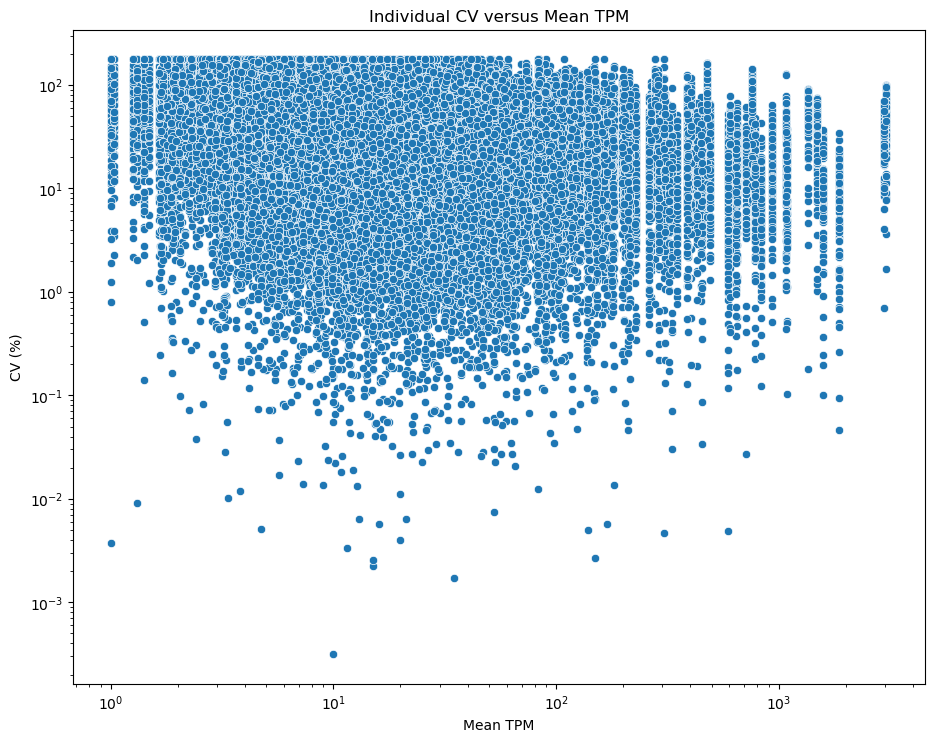

In [16]:
# Filter out rows where 'CV' is not NaN.
data = data[~data['CV'].isna()]

# Filter out rows where 'all_mean' is greater than 0.1.
data = data[data['all_mean'] > 0.1]

# Create the plot using seaborn.
plt.figure(figsize=(11, 8.5))
sns.scatterplot(x='all_mean', y='CV', data=data)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Mean TPM")
plt.ylabel("CV (%)")
plt.title("Individual CV versus Mean TPM")
plt.savefig("individual_cv_versus_mean_TPM.png")

# Display the plot.
plt.show()

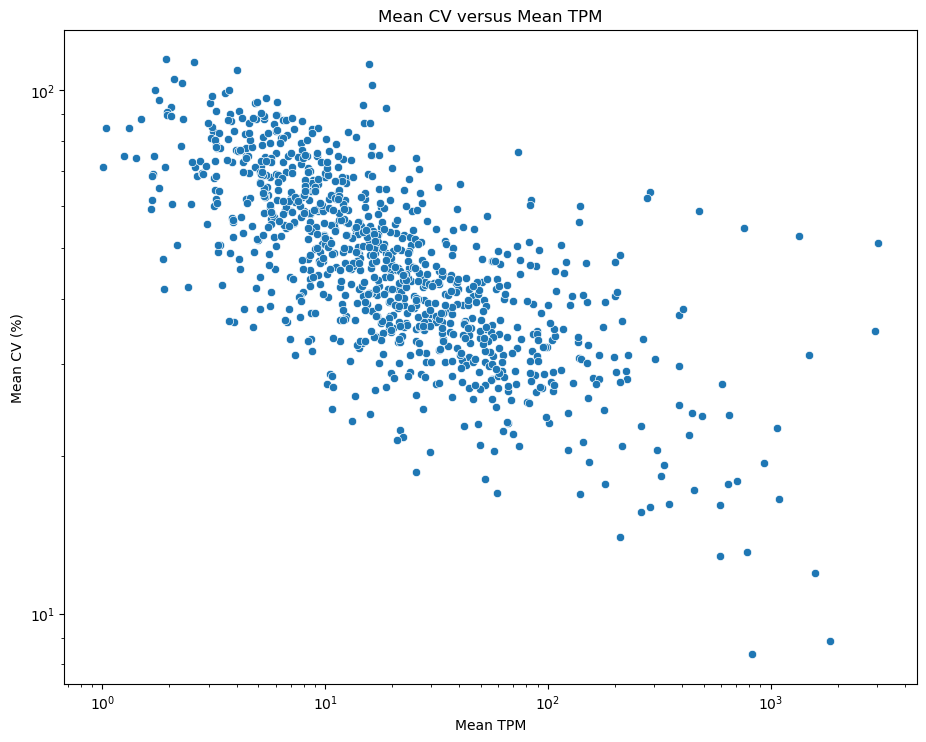

In [17]:
# Filter out rows where 'CV' is not NaN.
data = data[~data['CV'].isna()]

# Group by 'gene_id', 'Description', and 'all_mean', and calculate the mean of 'CV'.
Summary = data.groupby(['gene_id', 'Description', 'all_mean']).agg(mean_cv=('CV', 'mean')).reset_index()

# Filter out rows where 'all_mean' is greater than 0.1 (equivalent to filter(all_mean > 0.1) in R).
Summary = Summary[Summary['all_mean'] > 0.1]

# Create the plot using seaborn.
plt.figure(figsize=(11, 8.5))
sns.scatterplot(x='all_mean', y='mean_cv', data=Summary)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Mean TPM")
plt.ylabel("Mean CV (%)")
plt.title("Mean CV versus Mean TPM")
plt.savefig("mean_cv_versus_mean_TPM.png")

# Display the plot.
plt.show()








In [19]:
# Write the 'data' DataFrame to a CSV file.
data.to_csv("PY_Transformed AD Dataset Feb 23 for Purdue with CV.csv", index=False)

# Write the 'Summary' DataFrame to a CSV file.
Summary.to_csv("PY_Summary of CV.csv", index=False)